https://blog.csdn.net/Cream_Cicilian/article/details/105524521

In [1]:
import numpy as np
import cv2
from PIL import Image
import skimage
import matplotlib.pyplot as plt

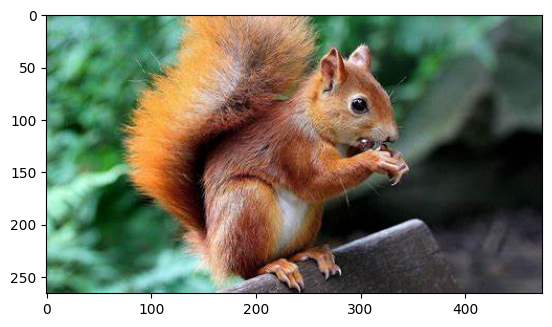

In [2]:
image = cv2.imread("../images/squirrel.jpg")
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))

# Canny 边缘检测

Canny - 高低阈值输出二值图像

T1， T2为阈值，凡是高于T2的都保留，凡是小于T1都丢弃，从高于T2的像素出发，凡是大于T1而且相互连接的，都保留。最终得到一个输出二值图像。

推荐的高低阈值比值为 T2: T1 = 3:1/2:1其中T2为高阈值，T1为低阈值

注意： 边缘检测无法检测图片的边缘,要检测图片边缘可以使用 copyMakeBorder 添加黑边

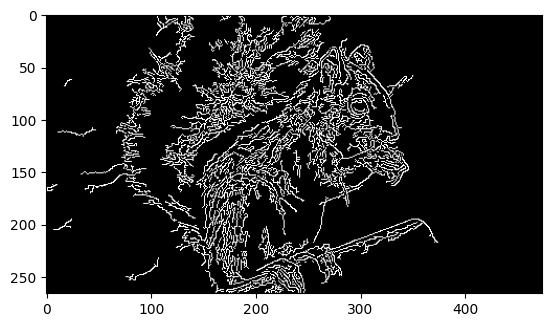

In [6]:
c = cv2.Canny(
    image=image,
    threshold1=85,
    threshold2=255,
    L2gradient=False,
)
plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))

# skimage.segmentation.find_boundaries

In [9]:
# 不能找彩色图像,找的是int和bool图像
b = skimage.segmentation.find_boundaries(
    label_img=image,
    connectivity=1,
    mode="outer"
)
plt.imshow(b)

Error in callback <function _draw_all_if_interactive at 0x000002BEDA6E8CA0> (for post_execute):


ValueError: Unsupported dtype

ValueError: Unsupported dtype

<Figure size 640x480 with 1 Axes>

# 二值图像找边缘

## 直接检测

In [19]:
image1 = cv2.imread("../images/horizon-10-mask.jpg", flags=0)
np.unique(image1)

array([0, 1, 2], dtype=uint8)

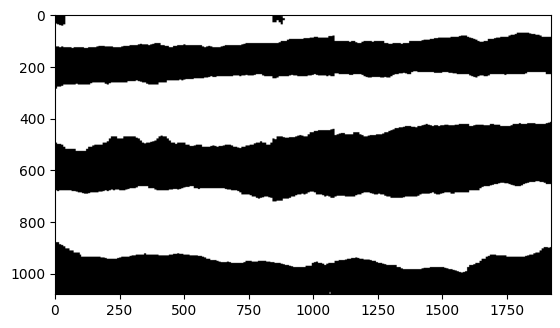

In [20]:
plt.imshow(image1 * 255, cmap="gray")

### Canny

[0 0 0 ... 0 0 0]


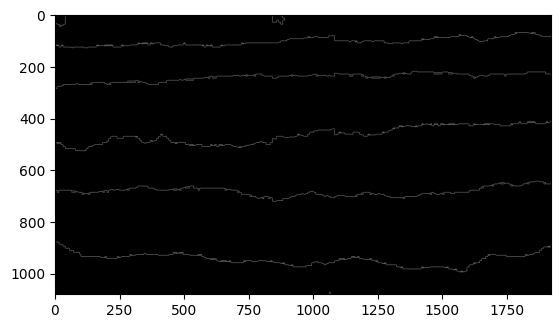

In [21]:
c = cv2.Canny(
    image=image1,
    threshold1=0.5,
    threshold2=1.5,
    L2gradient=False,
)
print(c[0]) # 没找到图片边缘
plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))

### find_boundaries

[0 0 0 ... 0 0 0]


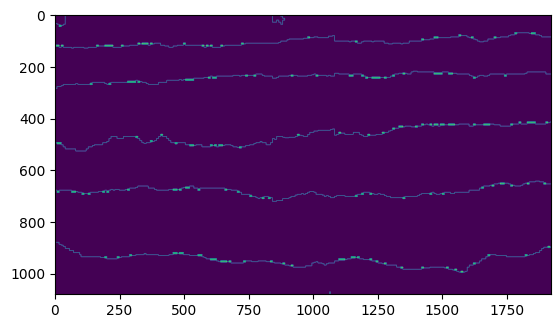

In [23]:
b = skimage.segmentation.find_boundaries(
    label_img=image1,
    mode="outer"
)
print(c[0]) # 没找到图片边缘
plt.imshow(b)

## 给图片添加黑边

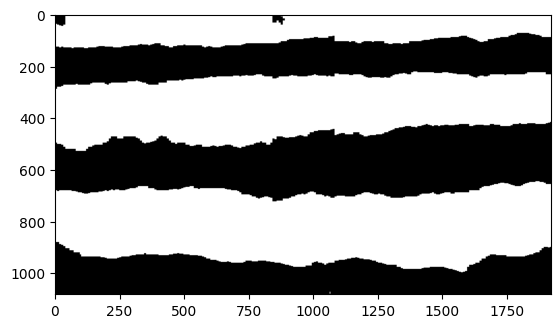

In [26]:
image2 = cv2.copyMakeBorder(
    src=image1,
    top=1,
    bottom=1,
    left=0,
    right=0,
    borderType=cv2.BORDER_CONSTANT,
    value=0,
)
plt.imshow(image2 * 255, cmap="gray")

### Canny

[  0   0   0 ... 255 255 255]


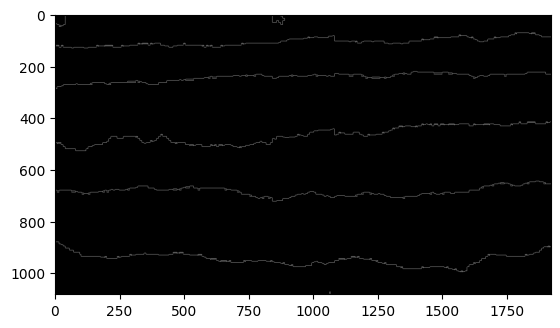

In [27]:
c = cv2.Canny(
    image=image2,
    threshold1=0.5,
    threshold2=1.5,
    L2gradient=False,
)
print(c[0])
plt.imshow(cv2.cvtColor(c, cv2.COLOR_BGR2RGB))

### find_boundaries

[  0   0   0 ... 255 255 255]


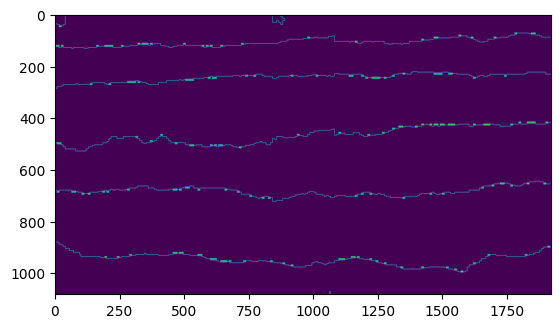

In [28]:
b = skimage.segmentation.find_boundaries(
    label_img=image2,
    mode="outer"
)
print(c[0])
plt.imshow(b)